In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2228 total number
#1522 dead
#1317 passengers 
#3024 1st
#284 2nd
#709 3rd

#805 male
#434 female
#112 children

In [3]:
df = pd.read_csv(r'/Users/Molnar/Documents/GitHub/Project-I/Kaggle/titanic/train.csv') 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

# Data Exploration

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#creating a new variable with the real value for the fare
df['FareCorr']=df['Fare']/(df['SibSp']+df['Parch']+1)
#indicating which lines had NaN values for age
df['age_NaN'] = df['Age'].isnull()
#replacing NaN in age for the mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareCorr,age_NaN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,False


In [7]:
df.groupby(['Sex'])['age_NaN'].value_counts(normalize=True)

Sex     age_NaN
female  False      0.831210
        True       0.168790
male    False      0.785095
        True       0.214905
Name: age_NaN, dtype: float64

In [8]:
#creating dummy variables for the catergorical columns 'Sex' and 'age_NaN'
df = pd.get_dummies(df, columns = ['Sex','age_NaN'])
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareCorr,Sex_female,Sex_male,age_NaN_False,age_NaN_True
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,35.64165,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,26.55000,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,8.05000,0,1,1,0


In [9]:
df['age_NaN_True'].value_counts(normalize=True)

0    0.801347
1    0.198653
Name: age_NaN_True, dtype: float64

In [10]:
df1 = df[['Survived','Pclass','SibSp','Parch','FareCorr','Age','age_NaN_True','Sex_female']]
df1.head()

,Survived,Pclass,SibSp,Parch,FareCorr,Age,age_NaN_True,Sex_female
0,0,3,1,0,3.62500,22.0,0,0
1,1,1,1,0,35.64165,38.0,0,1
2,1,3,0,0,7.92500,26.0,0,1
3,1,1,1,0,26.55000,35.0,0,1
4,0,3,0,0,8.05000,35.0,0,0


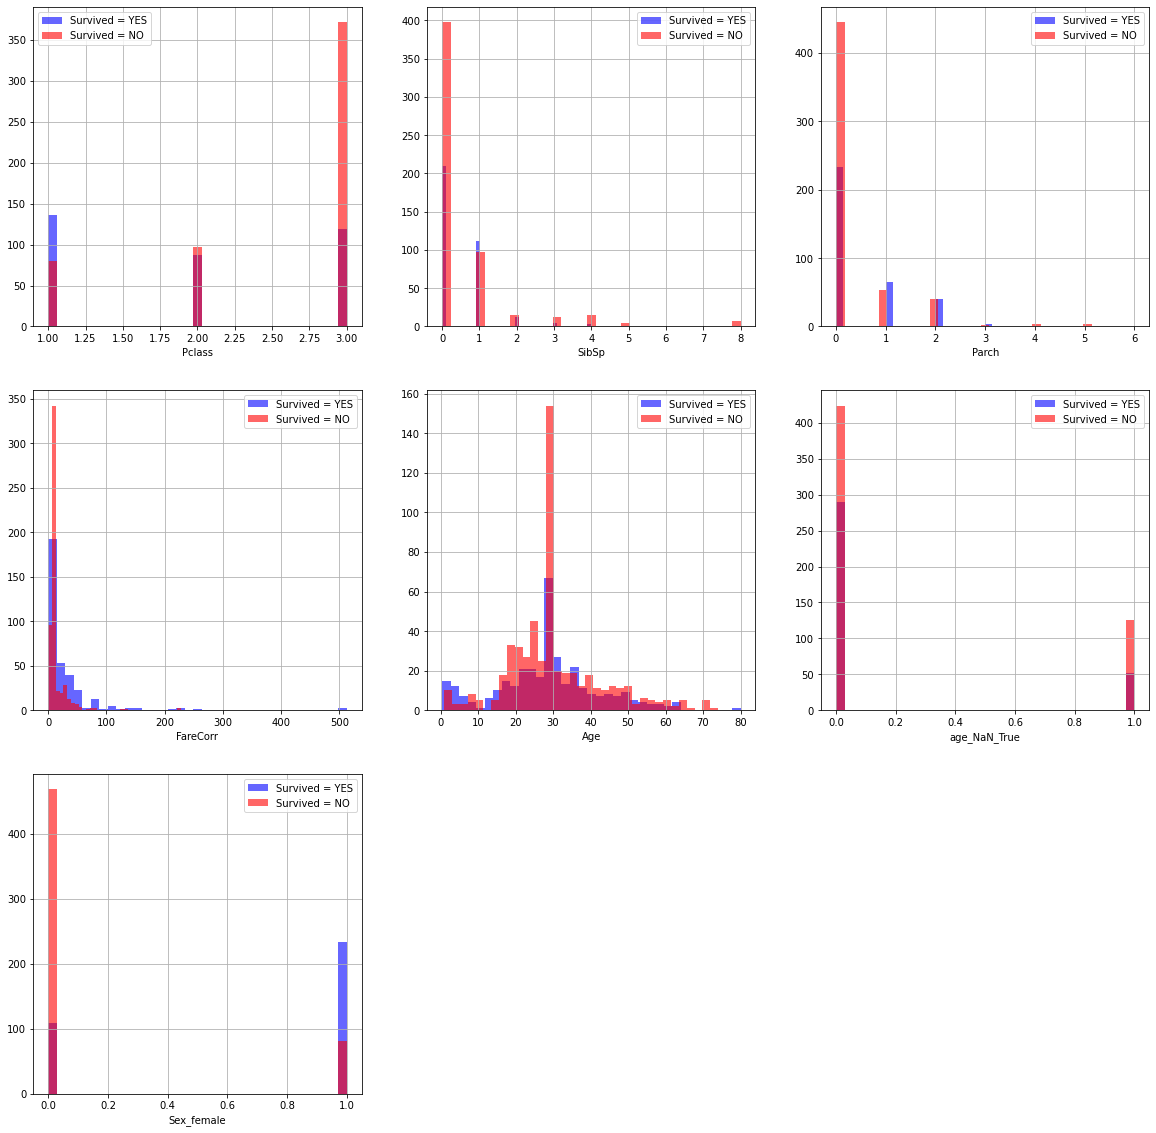

In [11]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df1.columns[list(range(1, df1.shape[1]))], 1):
    plt.subplot(3, 3, i)
    df1[df1["Survived"] == 1][column].hist(bins=35, color='blue', label='Survived = YES', alpha=0.6)
    df1[df1["Survived"] == 0][column].hist(bins=35, color='red', label='Survived = NO', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

<Figure size 2160x2160 with 0 Axes>

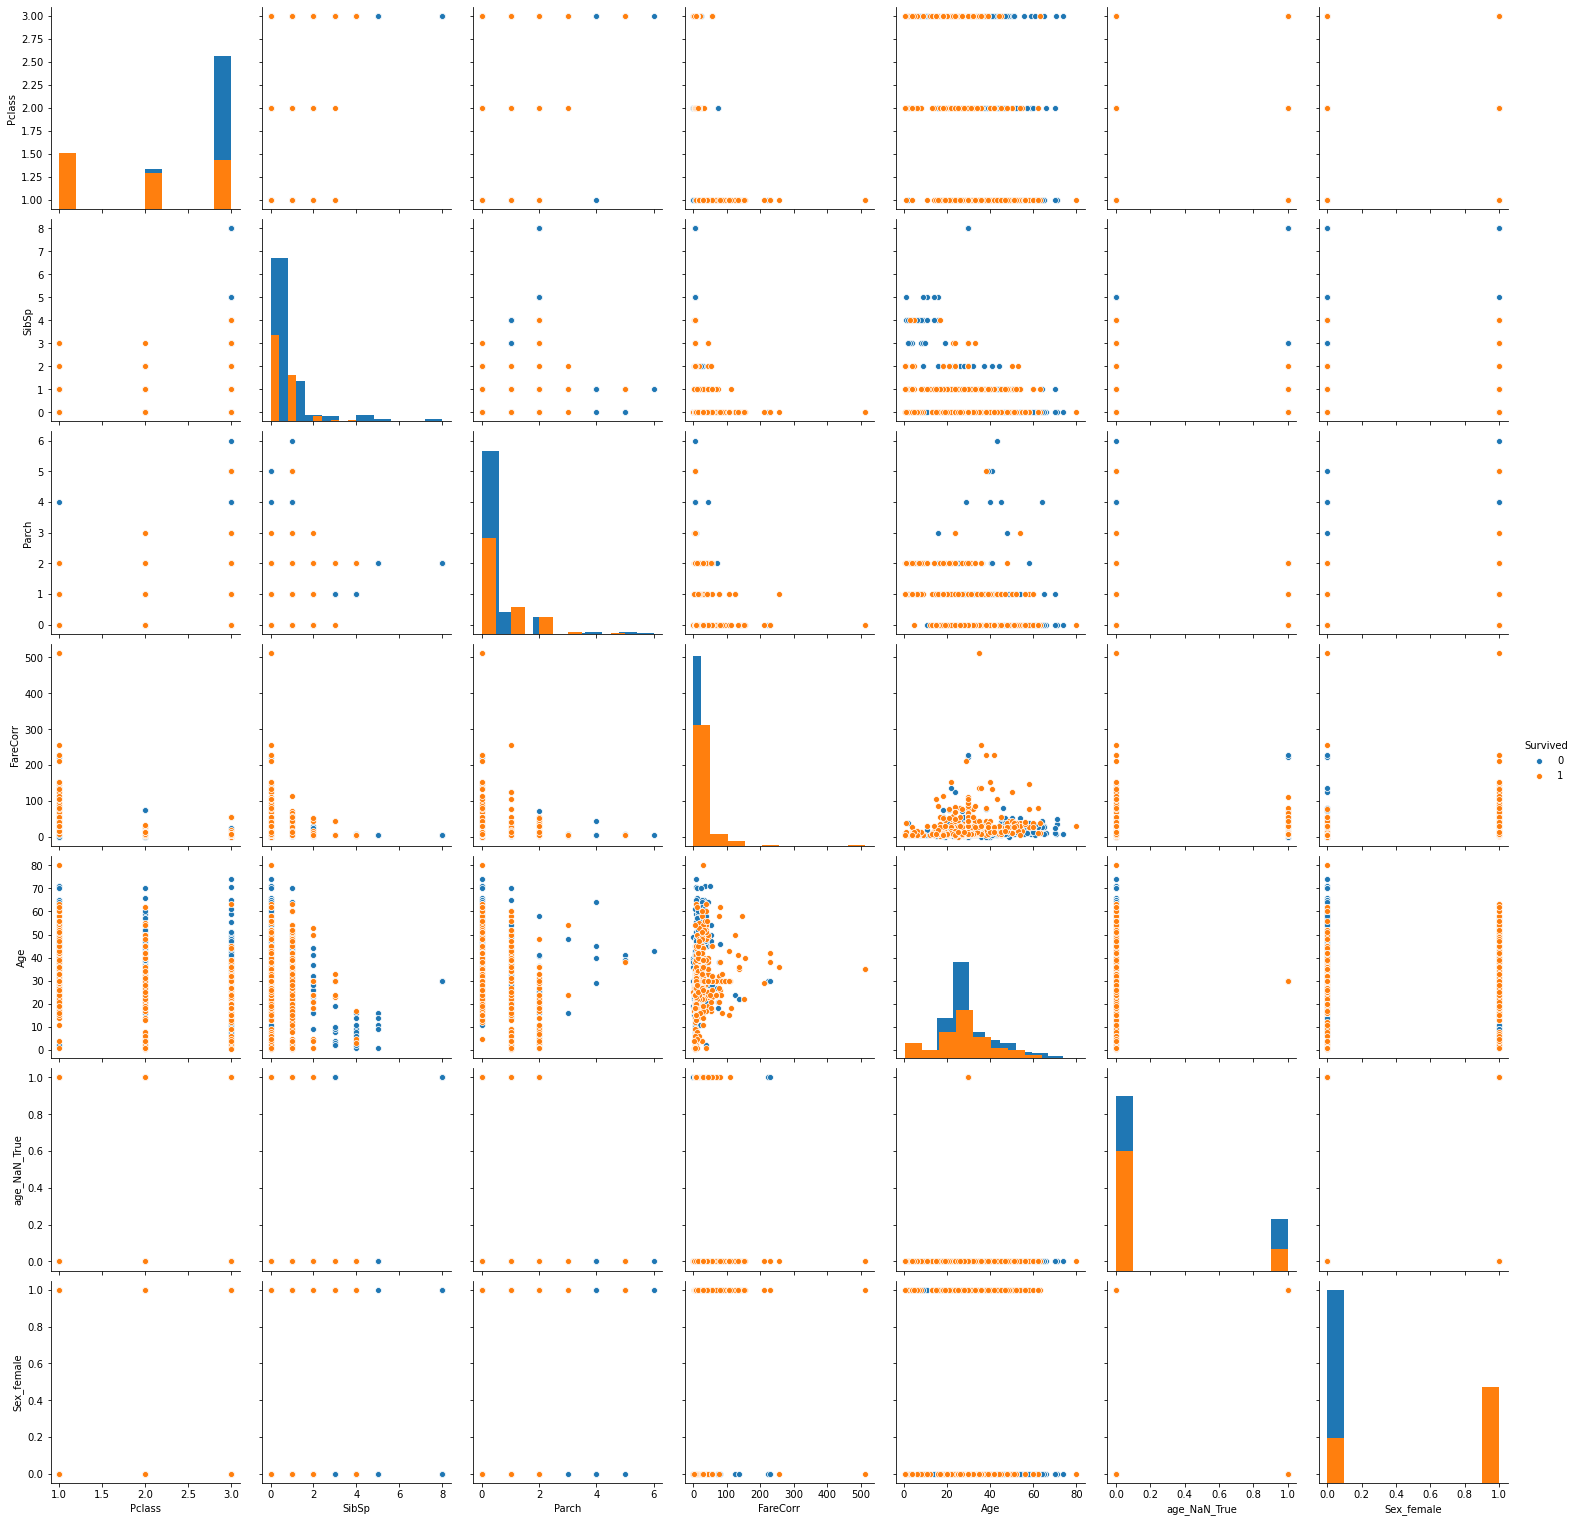

In [12]:
plt.figure(figsize=(30, 30))
sns.pairplot(df1, hue='Survived', height=3, diag_kind='hist')

-----

# Model Preparation

In [13]:
#Variables that we use to make the prediction in our model
Feature2 = df1.drop(['Survived'], axis=1)
Feature2.head()

,Pclass,SibSp,Parch,FareCorr,Age,age_NaN_True,Sex_female
0,3,1,0,3.62500,22.0,0,0
1,1,1,0,35.64165,38.0,0,1
2,3,0,0,7.92500,26.0,0,1
3,1,1,0,26.55000,35.0,0,1
4,3,0,0,8.05000,35.0,0,0


In [14]:
# Standardizing the parametres
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(Feature2).transform(Feature2)
X[0:5]

array([[ 0.82737724,  0.43279337, -0.47367361, -0.4547978 , -0.5924806 ,
        -0.49789473, -0.73769513],
       [-1.56610693,  0.43279337, -0.47367361,  0.43899428,  0.63878901,
        -0.49789473,  1.35557354],
       [ 0.82737724, -0.4745452 , -0.47367361, -0.33475695, -0.2846632 ,
        -0.49789473,  1.35557354],
       [-1.56610693,  0.43279337, -0.47367361,  0.18518744,  0.40792596,
        -0.49789473,  1.35557354],
       [ 0.82737724, -0.4745452 , -0.47367361, -0.33126739,  0.40792596,
        -0.49789473, -0.73769513]])

In [15]:
# Target variable
y = df1['Survived'].values
y[0:5]

array([0, 1, 1, 1, 0])

In [16]:
#inputs for the models
rand_state=13
n_est=1000
t_size=0.10

In [17]:
# Splitting the data two samples, training (90 %) and test (10 %) datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=t_size, random_state=rand_state)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (801, 7) (801,)
Test set: (90, 7) (90,)


# Bagging Algoritms

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


-----

## Decision Tree

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=n_est, random_state=rand_state)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[485   5]
 [  7 304]]
ACCURACY SCORE:
0.9850
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.985772    0.983819  0.985019    0.984796      0.985014
recall       0.989796    0.977492  0.985019    0.983644      0.985019
f1-score     0.987780    0.980645  0.985019    0.984213      0.985010
support    490.000000  311.000000  0.985019  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[50  9]
 [ 5 26]]
ACCURACY SCORE:
0.8444
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.909091   0.742857  0.844444   0.825974      0.851833
recall      0.847458   0.838710  0.844444   0.843084      0.844444
f1-score    0.877193   0.787879  0.844444   0.832536      0.846429
support    59.000000  31.000000  0.844444  90.000000     90.000000


In [20]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [21]:
scores

{'Bagging Classifier': {'Train': 0.9850187265917603,
  'Test': 0.8444444444444444}}

-----

-----

## Random Forrest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=rand_state, n_estimators=n_est)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[486   4]
 [  8 303]]
ACCURACY SCORE:
0.9850
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.983806    0.986971  0.985019    0.985388      0.985035
recall       0.991837    0.974277  0.985019    0.983057      0.985019
f1-score     0.987805    0.980583  0.985019    0.984194      0.985001
support    490.000000  311.000000  0.985019  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[52  7]
 [ 7 24]]
ACCURACY SCORE:
0.8444
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.881356   0.774194  0.844444   0.827775      0.844444
recall      0.881356   0.774194  0.844444   0.827775      0.844444
f1-score    0.881356   0.774194  0.844444   0.827775      0.844444
support    59.000000  31.000000  0.844444  90.000000     90.000000


In [23]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

In [24]:
scores

{'Bagging Classifier': {'Train': 0.9850187265917603,
  'Test': 0.8444444444444444},
 'Random Forest': {'Train': 0.9850187265917603, 'Test': 0.8444444444444444}}

-----

## Extra Trees

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=n_est, max_features=7, random_state=rand_state)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[489   1]
 [ 11 300]]
ACCURACY SCORE:
0.9850
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.978000    0.996678  0.985019    0.987339      0.985252
recall       0.997959    0.964630  0.985019    0.981295      0.985019
f1-score     0.987879    0.980392  0.985019    0.984135      0.984972
support    490.000000  311.000000  0.985019  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[50  9]
 [ 7 24]]
ACCURACY SCORE:
0.8222
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.877193   0.727273  0.822222   0.802233      0.825554
recall      0.847458   0.774194  0.822222   0.810826      0.822222
f1-score    0.862069   0.750000  0.822222   0.806034      0.823467
support    59.000000  31.000000  0.822222  90.000000     90.000000


In [26]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

In [27]:
scores

{'Bagging Classifier': {'Train': 0.9850187265917603,
  'Test': 0.8444444444444444},
 'Random Forest': {'Train': 0.9850187265917603, 'Test': 0.8444444444444444},
 'Extra Tree': {'Train': 0.9850187265917603, 'Test': 0.8222222222222222}}

-------

# Boosting Algoritms

## AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=n_est)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[452  38]
 [ 47 264]]
ACCURACY SCORE:
0.8939
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.905812    0.874172  0.893883    0.889992      0.893527
recall       0.922449    0.848875  0.893883    0.885662      0.893883
f1-score     0.914055    0.861338  0.893883    0.887696      0.893586
support    490.000000  311.000000  0.893883  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[50  9]
 [ 7 24]]
ACCURACY SCORE:
0.8222
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.877193   0.727273  0.822222   0.802233      0.825554
recall      0.847458   0.774194  0.822222   0.810826      0.822222
f1-score    0.862069   0.750000  0.822222   0.806034      0.823467
support    59.000000  31.000000  0.822222  90.000000     90.000000


In [29]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [30]:
scores

{'Bagging Classifier': {'Train': 0.9850187265917603,
  'Test': 0.8444444444444444},
 'Random Forest': {'Train': 0.9850187265917603, 'Test': 0.8444444444444444},
 'Extra Tree': {'Train': 0.9850187265917603, 'Test': 0.8222222222222222},
 'AdaBoost': {'Train': 0.8938826466916354, 'Test': 0.8222222222222222}}

-----

## Stochastic Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=n_est, random_state=rand_state)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[486   4]
 [ 11 300]]
ACCURACY SCORE:
0.9813
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.977867    0.986842  0.981273    0.982355      0.981352
recall       0.991837    0.964630  0.981273    0.978233      0.981273
f1-score     0.984802    0.975610  0.981273    0.980206      0.981233
support    490.000000  311.000000  0.981273  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[51  8]
 [ 4 27]]
ACCURACY SCORE:
0.8667
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.927273   0.771429  0.866667   0.849351      0.873593
recall      0.864407   0.870968  0.866667   0.867687      0.866667
f1-score    0.894737   0.818182  0.866667   0.856459      0.868368
support    59.000000  31.000000  0.866667  90.000000     90.000000


In [32]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [33]:
scores

{'Bagging Classifier': {'Train': 0.9850187265917603,
  'Test': 0.8444444444444444},
 'Random Forest': {'Train': 0.9850187265917603, 'Test': 0.8444444444444444},
 'Extra Tree': {'Train': 0.9850187265917603, 'Test': 0.8222222222222222},
 'AdaBoost': {'Train': 0.8938826466916354, 'Test': 0.8222222222222222},
 'Gradient Boosting': {'Train': 0.9812734082397003,
  'Test': 0.8666666666666667}}

-----

# Voting Ensemble

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[450  40]
 [ 79 232]]
ACCURACY SCORE:
0.8514
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.850662    0.852941  0.851436    0.851801      0.851547
recall       0.918367    0.745981  0.851436    0.832174      0.851436
f1-score     0.883219    0.795883  0.851436    0.839551      0.849310
support    490.000000  311.000000  0.851436  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[53  6]
 [ 8 23]]
ACCURACY SCORE:
0.8444
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.868852   0.793103  0.844444   0.830978      0.842761
recall      0.898305   0.741935  0.844444   0.820120      0.844444
f1-score    0.883333   0.766667  0.844444   0.825000      0.843148
support    59.000000  31.000000  0.844444  90.000000     90.000000


In [35]:
estimators

[('Logistic', LogisticRegression(solver='liblinear')),
 ('Tree', DecisionTreeClassifier()),
 ('SVM', SVC())]

In [36]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

----

# Results

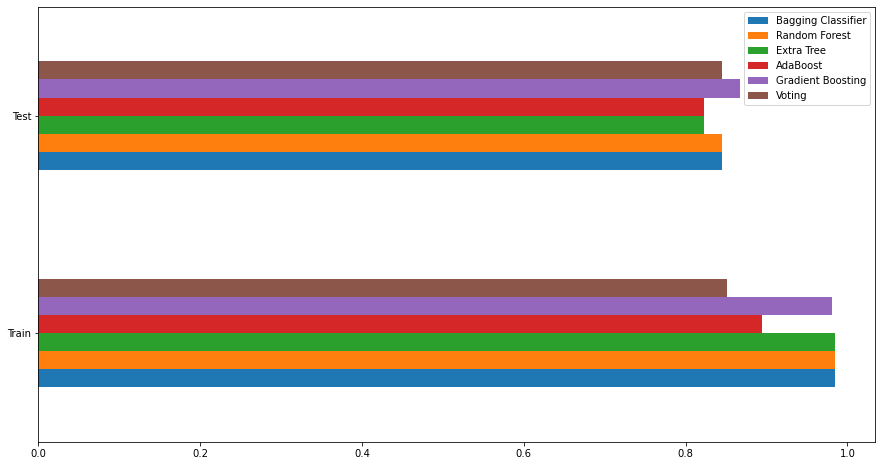

In [37]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))